## **Tugas Besar Pengganti Ujian Akhir Semester (UAS), Semester Genap 2022/2023**
### Deadline: Selasa, 20 Juni 2023, Jam 23.59
##### Dosen: FYS, DKT, ITQ

---
***'Dengan ini kami menyatakan bahwa tugas ini dibuat sebenar-benarnya hasil kerjasama kami dalam kelompok. Kami menjunjung tinggi aspek kejujuran sehingga kami dapat pastikan hasil ini bukan berasal dari meniru/mencontek/meminta hasil/berdiskusi dengan kelompok lain, baik dalam satu kelas yang sama maupun berbeda'***

---
Bandung, .... Juni 2023

> Kelompok: ...........
>
> Anggota:
> 1. Nama Lengkap, NIM, kontribusi terhadap pekerjaan (dalam %)
> 2. Nama Lengkap, NIM, kontribusi terhadap pekerjaan (dalam %)
> 3. ...
> 4. ....

Contoh:
1. Yan LeCun, 07760017, 40% 
2. Yoshua Bengio, 08670018, 30%
3. David Silver, 00980017, 30%

Total 100%

### **Penjelasan (harus dibaca dan dimengerti)**:
* Tugas besar harus dikerjakan menggunakan bahasa pemrograman `Python` dan *library* `Scikit-Learn`. 
* Pada setiap bagian jawaban, anda bisa menambahkan cell `code` untuk kode maupun cell `Markdown` untuk penjelasan, sesuai dengan kebutuhan masing-masing.
* Dikumpulkan sesuai dengan tenggat waktu, setiap keterlambatan akan diberikan hukuman pengurangan 10 poin setiap kelipatan 15 menit.
* Dikerjakan dengan `Jupyter Lab` atau `Jupyter Notebook`, dan dikumpulkan dalam bentuk file dengan extension `.ipynb` yang digunakan pada `Jupyter Notebook/Jupyter Lab` (tidak boleh dalam format lain)

## 1. Support Vektor Machine (SVM) (30%)

## Ketentuan dataset 

### Generate sample data

generate dataset sesuai dengan ketentuan nomer kelompok masing-masing dengan penggantian noise untuk dataset kelompok ganjil dan penggantian cluster_std untuk yang genap:

**Ketentuan noise dan cluster_std yang harus diganti**: Jumlah semua nim belakang kelompok dibagi 100. Contoh: tim 115090010, 115090012, 115090015, dan 115090016. Penjumlahan nim belakang 0+2+5+6 = 13. Noise = 13/100 = 0.26.

1. Kelompok Ganjil -> 
    
    X, y =make_moons(300, noise=0.13, random_state=100)
2. Kelompok Genap -> 
    
    centers = [[1, 0.3], [1, 0.8]]
    
    X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.13, random_state=100)

Data diatas kita misalkan anda memperoleh data pengukuran hubungan tegangan (V) -> (X1) dan arus (I)-> (X2) dari output dua jenis sensor yang berbeda (**Sensor A** dan **Sensor B**) setelah dihubungkan dengan sebuah sistem minimum.  Buatlah ploting scatter dari hasil pengukuran 300 unit sensor untuk tipe output sensor A dan B.

### 1. Generate dataset sesuai ketentuan diatas dan ploting scatter dari dataset.(5%)

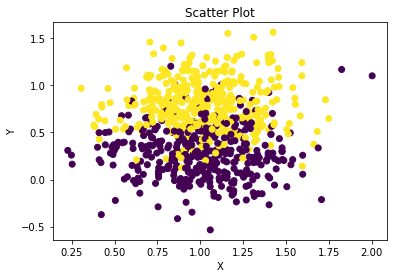

In [3]:
# Generate some data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons


## Ganti code dibawah disesuaikan nomer kelompok masing-masing
## Contoh kelompok genap dengan cluster_std = 0.26
centers = [[1, 0.3], [1, 0.8]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.26, random_state=100) #Diganti cluster_std 

##Ploting dengan scatter
# Plot the blobs using scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Kemudian, sebagai seorang Engineer yang mengerti *Machine Learning*, anda diminta untuk mengklasifikasikan kedua jenis sensor tersebut berdasarkan pengukuran arus dan tegangan sensor. Atasan anda meminta menggunakan metode ***Support Vector Machine***.

Atasan anda meminta untuk membuat model **SVM linier dan SVM non linier**.

### 2. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel linier.(20%)

In [10]:
## Lakukan berulang kali process training dengan mengganti hyperparameter SVM linier (C) dengan ukuran kinerja akurasi
# import library 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# split dataset Training size 85 % testing Size 15 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# fit model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# cek hasil ke data test pengukuran akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print()

# lakukan fitting berapa kali dengan mengubah  hyperparameter sehingga memdapatkan model terbaik dan gunakan data test untuk evaluasi.
best_accuracy = 0.0
best_model = None
best_C = None

for C in [0.01, 0.1, 1, 10, 100]:

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for C={C}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
        best_C = C

print(f"\nBest C: {best_C}")
print(f"Best Accuracy: {best_accuracy}")


Accuracy: 0.8584070796460177

Accuracy for C=0.01: 0.8584070796460177
Accuracy for C=0.1: 0.8584070796460177
Accuracy for C=1: 0.8584070796460177
Accuracy for C=10: 0.8584070796460177
Accuracy for C=100: 0.8584070796460177

Best C: 0.01
Best Accuracy: 0.8584070796460177


### 3. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel non linier.

 ### 3.1 SVM non linier polynomial (20 %)
 diminta untuk menggunakan kernel Polynomial. Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Orde dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).

In [11]:
## Lakukan berulang kali process training dengan mengganti hyperparameter SVM non linier polynomial (C dan orde polynomial) dengan ukuran kinerja akurasi
# import library 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# split dataset Training size 85 % testing Size 15 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# fit model
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# cek hasil ke data test pengukuran akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# lakukan fitting berapa kali dengan mengubah  hyperparameter sehingga memdapatkan model terbaik dan gunakan data test untuk evaluasi.

best_accuracy = 0.0
best_model = None
best_C = None
best_degree = None

# Iterate through different values of C and degree
for C in [0.01, 0.1, 1, 10, 100]:
    for degree in [2, 3, 4, 5]:
        clf = svm.SVC(kernel='poly', C=C, degree=degree)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for C={C}, degree={degree}: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf
            best_C = C
            best_degree = degree

# Print the best hyperparameters and corresponding accuracy
print(f"\nBest C: {best_C}")
print(f"Best Degree: {best_degree}")
print(f"Best Accuracy: {best_accuracy}")

Accuracy: 0.8141592920353983
Accuracy for C=0.01, degree=2: 0.8672566371681416
Accuracy for C=0.01, degree=3: 0.8141592920353983
Accuracy for C=0.01, degree=4: 0.7964601769911505
Accuracy for C=0.01, degree=5: 0.7787610619469026
Accuracy for C=0.1, degree=2: 0.8495575221238938
Accuracy for C=0.1, degree=3: 0.8141592920353983
Accuracy for C=0.1, degree=4: 0.7964601769911505
Accuracy for C=0.1, degree=5: 0.7699115044247787
Accuracy for C=1, degree=2: 0.8495575221238938
Accuracy for C=1, degree=3: 0.8141592920353983
Accuracy for C=1, degree=4: 0.7876106194690266
Accuracy for C=1, degree=5: 0.7699115044247787
Accuracy for C=10, degree=2: 0.8495575221238938
Accuracy for C=10, degree=3: 0.8141592920353983
Accuracy for C=10, degree=4: 0.7876106194690266
Accuracy for C=10, degree=5: 0.7787610619469026
Accuracy for C=100, degree=2: 0.8495575221238938
Accuracy for C=100, degree=3: 0.8141592920353983
Accuracy for C=100, degree=4: 0.7876106194690266
Accuracy for C=100, degree=5: 0.7610619469026548

 ### 3.2 SVM non linier similarity fitur (20 %)

 Diminta untuk menggunakan kernel Radial Basis Function (RBF). Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Gamma ($\gamma$) dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).

In [12]:
## Lakukan berulang kali process training dengan mengganti hyperparameter SVM non linier polynomial (C dan orde polynomial) dengan ukuran kinerja akurasi
# import library 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# split dataset Training size 85 % testing Size 15 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# fit model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# cek hasil ke data test pengukuran akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("")

# lakukan fitting berapa kali dengan mengubah  hyperparameter sehingga memdapatkan model terbaik dan gunakan data test untuk evaluasi.

best_accuracy = 0.0
best_model = None
best_C = None
best_gamma = None

# Iterate through different values of C and degree
for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1, 1, 10]:
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for C={C}, degree={degree}: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf
            best_C = C
            best_gamma = gamma

# Print the best hyperparameters and corresponding accuracy
print(f"\nBest C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Accuracy: {best_accuracy}")

Accuracy: 0.8761061946902655

Accuracy for C=0.01, degree=5: 0.3893805309734513
Accuracy for C=0.01, degree=5: 0.3893805309734513
Accuracy for C=0.01, degree=5: 0.8584070796460177
Accuracy for C=0.01, degree=5: 0.8230088495575221
Accuracy for C=0.1, degree=5: 0.3893805309734513
Accuracy for C=0.1, degree=5: 0.8761061946902655
Accuracy for C=0.1, degree=5: 0.8761061946902655
Accuracy for C=0.1, degree=5: 0.8761061946902655
Accuracy for C=1, degree=5: 0.8761061946902655
Accuracy for C=1, degree=5: 0.8672566371681416
Accuracy for C=1, degree=5: 0.8761061946902655
Accuracy for C=1, degree=5: 0.8761061946902655
Accuracy for C=10, degree=5: 0.8672566371681416
Accuracy for C=10, degree=5: 0.8672566371681416
Accuracy for C=10, degree=5: 0.8672566371681416
Accuracy for C=10, degree=5: 0.8407079646017699
Accuracy for C=100, degree=5: 0.8672566371681416
Accuracy for C=100, degree=5: 0.8761061946902655
Accuracy for C=100, degree=5: 0.8672566371681416
Accuracy for C=100, degree=5: 0.849557522123893

**Bonus**

Gunakan gridsearchCV untuk menentukan model terbaik dari opsi kernel dan lain-lain

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

svm_model = svm.SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {accuracy}")

Best Hyperparameters:
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy: 0.8761061946902655


### 4. Analisis model SVM (30 %)

Dari 3 percobaan training diatas, dataset yang kalian dapatkan akan menemukan solusi yang terbaik jika menggunakan model SVM linier atau non linier. Fitting lagi model terbaik diatas.

In [ ]:
#fitting ulang best model

## Analisis 

-Jawab disini

### 5. Testing dengan 2 data.(5%)

Ambil 2 data test secara rendem dari data test lalu prediksi tunjukan apakan hasil klasifikasi sesuai atau tidak dengan label

In [ ]:
## prediksi data baru

## 1. Unsupervised learning.(30%)

## Ketentuan dataset 

Dataset untuk setiap kelompok berbeda-beda disesuaikan nama file dataset di google drive berikut:
https://drive.google.com/drive/folders/1NV4Q5qPYBSv1GqbQVU5HFQP40bHbiqgN?usp=sharing


##### Soal #####
Metode yang digunakan untuk disesuaikan dengan dataset dari masing-masing kelompok.
1. Ploting dataset dengan menggunakan scatter.
2. Carilah jumlah klaster jika kalian menggunakan metode k-means dan gaussian maxture, atau carilah nilai epsilon (eps) dan minimal naigborhood (min_samples). Lakukan training bekali-kali dengan mengganti jumlah claster lalu buat grafik inertia atau grafik Silhouette score untuk metode kmeans atau grafik BIC dan AIC  untuk gaussian mixture dan tentukan jumlah cluster yang tepat. Lakukan training bekali-kali dengan mengganti dengan mengganti nilai epsilon (eps) dan minimal naigborhood (min_samples) untuk dbscans.
3. Lakukan process training kembali dengan jumlah cluster yang telah ditentukan di point Kedua.
4. Ploting hasil clastering dan analisis apakah pemilihan metode sudah tepat sesuai dengan karakteristik dataset kelompok masing-masing.

### 1. Load dataset (10%)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

namafile = 'clustering_data1.csv'
data_train = pd.read_csv(namafile)

In [ ]:
## ploting dengan scatter X1 dan X2



### 2. Carilah jumlah klaster jika kalian menggunakan metode k-means dan gaussian maxture, atau carilah nilai epsilon (eps) dan minimal naigborhood (min_samples). Lakukan training bekali-kali dengan mengganti jumlah claster lalu buat grafik inertia atau grafik Silhouette score untuk metode kmeans atau grafik BIC dan AIC  untuk gaussian mixture dan tentukan jumlah cluster yang tepat. Lakukan training bekali-kali dengan mengganti dengan mengganti nilai epsilon (eps) dan minimal naigborhood (min_samples) untuk dbscans. (40 %)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
## Pilih salah satu metode diatas

## Lakukan training bekali-kali cari klaster terbaik
## KMeans = grafik inertia  atau grafik Silhouette score
## Gaussian mixture = grafik BIC dan AIC


## Grafik grafik inertia  atau grafik Silhouette score untuk KMeans atau grafik BIC dan AIC  untuk Gaussian mixture



# untuk DBSCAN pilih nilai epsilon (eps) dan minimal naigborhood (min_samples) 
# Lakukan training bekali-kali cari klaster terbaik dengan ploting hasil cluster 



#### 3. Lakukan process training kembali dengan jumlah cluster atau nilai epsilon (eps) dan minimal naigborhood yang telah ditentukan di point Kedua. (30 %)

In [ ]:
## Jawaban diatas



#### 4. Ploting hasil clastering dan analisis apakah pemilihan metode sudah tepat sesuai dengan karakteristik dataset kelompok masing-masing. (20%)

In [16]:
## Jawaban diatas


## 3. Dimentional Reduction dan ANN (40%)

Ketentuan dataset:
1. Kelompok Ganjil sklearn dataset mnist_784 digit tulisan tangan-> 
    
    X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
2. Kelompok Genap sklearn dataset mnist_784 fashion -> 
    
    X, y  = datasets.fetch_openml(name="Fashion-MNIST", version=1)

Ketentuan pertanyaan sesuai nomer kelompok untuk dimentional reduction:
1. Variansi 90%, berapakah komponen fitur yang dipertahankan?
2. Variansi 95%, berapakah komponen fitur yang dipertahankan?
3. Variansi 89%, berapakah komponen fitur yang dipertahankan?
4. Variansi 92%, berapakah komponen fitur yang dipertahankan?
5. Variansi 94%, berapakah komponen fitur yang dipertahankan?
6. Variansi 85%, berapakah komponen fitur yang dipertahankan?
7. Variansi 80%, berapakah komponen fitur yang dipertahankan?
8. Variansi 82%, berapakah komponen fitur yang dipertahankan?
9. Fitur yang dipertahankan 200, berapa persen variansinya?
10. Fitur yang dipertahankan 250, berapa persen variansinya?
11. Fitur yang dipertahankan 220, berapa persen variansinya?
12. Fitur yang dipertahankan 280, berapa persen variansinya?
13. Fitur yang dipertahankan 230, berapa persen variansinya?
14. Fitur yang dipertahankan 300, berapa persen variansinya?
15. Fitur yang dipertahankan 290, berapa persen variansinya?
16. Fitur yang dipertahankan 210, berapa persen variansinya?



### 1. Load dataset(10%)

Pilih dataset sesuai ketentuan diatas blok semua data code yang bukan ketentuan dataset.

In [ ]:
## Kelompok Ganjil
## commant 4 line code dibawah ini jika kelompok genap
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist["data"]
y = mnist["target"]

## Kelompok genap
## commant 4 line code dibawah ini jika kelompok ganjil
from sklearn.datasets import fetch_openml
mnistFashion = fetch_openml('Fashion-MNIST', version=1, cache=True)
X = mnistFashion["data"]
y = mnistFashion["target"]

Print berapa fitur dan jumlah data yang dimiliki.

In [19]:
## print jumlah fitur dan jumlah data


Ploting image satu data dan cocokan dengan fiturnya

In [21]:
#ploting image



### 2. Lakukan Dimentional Reduction dengan PCA sesuai dengan ketentuan pertanyaan masing-masing kelompok(30%)

fitting dengan PCA ganti hyperparameter berapa variansi yang diinginkan atau komponen yang ingin dipertahankan sesuai ketentuan diatas

In [27]:
#fitting dengan PCA ganti hyperparameter 



#### Berapa komponen atau variansi yang dipertahankan?

In [28]:
#Variansi atau berapa komponen


### 2. Reduce semua fitur yang ada sebelumnya dengan ketentuan pertanyaan diatas (fit_transform)10%

In [29]:
# reduce fitur data diatas



### 3. Dengan menggunakan Model ANN. (20%)

Gunakan ANN untuk metode klasifikasi.  Training data yang belum dan sudah di reduce lalu bandingkan hasil classifikasinya menggunakan pengukuran performace (accurasi,recall, presisi dan lain-lain). tunning hyperparameter berulang kali atau gunakan gridsearchCV.

#### 4. (Analisis)Perbandingan kedua model dari 2 dataset dengan pengukuran performace (accurasi,recall, presisi dan lain-lain).(30%)

Bandingkan apakah ada efek dari pengurangan dimensi yang dilakukan dengan PCA.

In [30]:
## accurasi,recall, presisi dan lain-lain



-Analisis

Jawab

### Bonus

Gunakan semua metode klasifikasi yang sudah digunakan dengan membandingkan dataset yang belum dan sudah direduce. Pilih Metode mana yang memilikin akurasi yang terbaik kemudian analisis.

In [ ]:
## Implementasi code

-Analisis
